## Como estudiar un dataset
#### Preparando el entorno

In [2]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.0 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode

In [4]:
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')


#### Carga el fichero

In [5]:
df = pd.read_csv('/kaggle/input/datasettttttt/ds-subtopics-combined-v8.csv')
df

,VERBATIM,CODES
0,"Me enviaron un producto equivocado, y ahora te...",0103
1,Mi pedido llegó incorrectamente y ahora tengo ...,0103
2,Me enviaron una cafetera que no coincide en ab...,0103
3,Estoy molesto porque falta una pieza important...,0103
4,Pedí cápsulas de café específicas y me dieron ...,0103
...,...,...
20362,Continuas averías de las máquinas VERTUO,0207
20363,Ptoducto de calidad. Trato muy profesional. Pr...,"9201,9801"
20364,Tuve problemas para la recepción de pedido.,0095
20365,Hice un pedido con entrega programada y me lle...,"0102,0104"


#### Cargar los codigos que existen en el dataset

In [6]:
def imprimir(unique_codes):
    print("Códigos únicos formateados:")
    print(", ".join(unique_codes))

def restantes(unique_codes):
    codigos_completos = [
        "0101", "0102", "0103", "0104",
        "0201", "0202", "0203", "0204", "0205", "0206", "0207", "0208",
        "0301", "0302",
        "0401", "0402", "0403", "0404", "0405", "0406", "0495",
        "0501",
        "0601",
        "0701", "0702", "0708",
        "0808",
        "0095",
        "9101", "9201", "9202", "9203", "9301", "9401", "9501", "9601", "9701", "9702", "9801", "9995", "0009"
    ]
    # Convertir ambas listas a conjuntos para realizar la operación de diferencia
    unique_set = set(unique_codes)
    codigos_completos_set = set(codigos_completos)
    # Encontrar los códigos que faltan
    codigos_faltantes = codigos_completos_set - unique_set
    # Imprimir los códigos que faltan
    print("Códigos faltantes:")
    for codigo in codigos_faltantes:
        print(codigo)

split_codes = df['CODES'].str.findall(r'\d+')
formatted_codes = []
for codes_list in split_codes.dropna():
  for code in codes_list:
    formatted_code = code.zfill(4)
    formatted_codes.append(formatted_code)
    
unique_codes = set(formatted_codes)
imprimir(unique_codes)

# Ver que codigos no estan
numero_de_codigos_diferentes = len(unique_codes)
print("Número de códigos:", numero_de_codigos_diferentes)

restantes(unique_codes)

Códigos únicos formateados:
9401, 0202, 9203, 0009, 0402, 0406, 9501, 0701, 0208, 0103, 0702, 9801, 0405, 0401, 9601, 0205, 9101, 9995, 0808, 0101, 0203, 0601, 0095, 9702, 0403, 0102, 0207, 0201, 0302, 0708, 0501, 0301, 9202, 0104, 9301, 9701, 0204, 0404, 9201, 0206
Número de códigos: 40
Códigos faltantes:
0495


#### Crear el histograma de frecuencia de los códigos

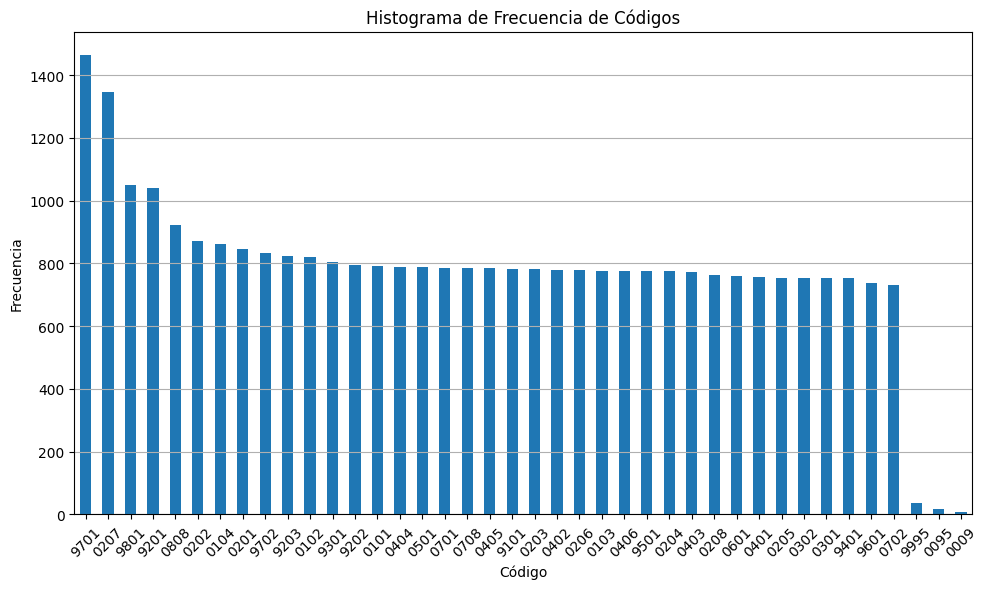

In [7]:
codigo_frecuencia = pd.Series(formatted_codes).value_counts()
plt.figure(figsize=(10, 6))
codigo_frecuencia.plot(kind='bar')
plt.title('Histograma de Frecuencia de Códigos')
plt.xlabel('Código')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Crear el histograma de frecuencia de verabtims unicos por CODE

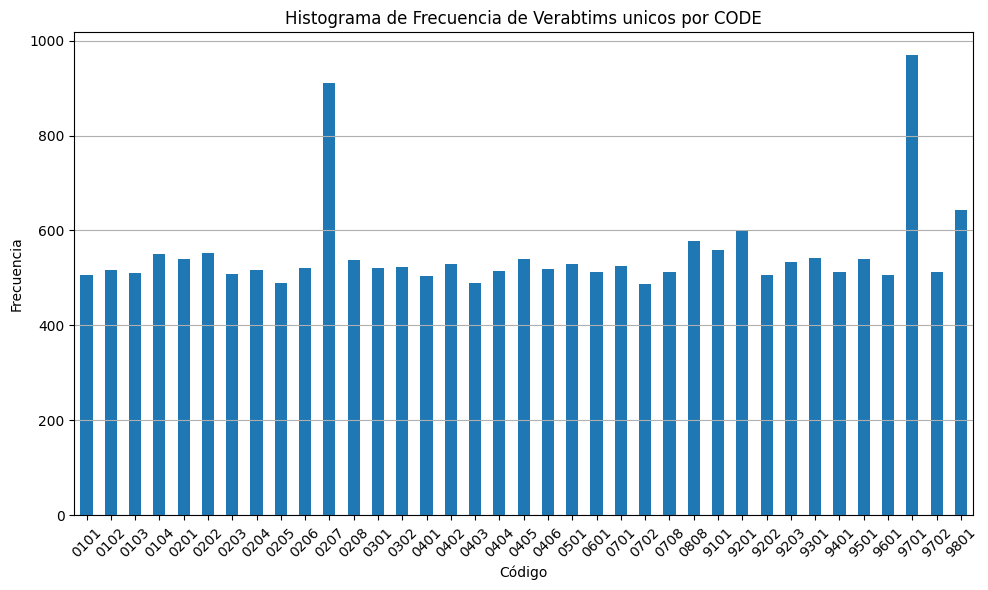

In [8]:
import matplotlib.pyplot as plt

# Convertir la lista de códigos formateados a una Serie
formatted_codes_series = pd.Series(formatted_codes)

# Dividir los códigos en cada fila
df['CODES'] = formatted_codes_series.str.split(',')

# Expandir filas para cada código
df = df.explode('CODES')

# Agrupar por código y contar la cantidad de comentarios únicos
diversidad_comentarios = df.groupby('CODES')['VERBATIM'].nunique()

plt.figure(figsize=(10, 6))
diversidad_comentarios.plot(kind='bar')
plt.title('Histograma de Frecuencia de Verabtims unicos por CODE')
plt.xlabel('Código')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Crear el histograma de frecuencia de códigos y verbátims únicos

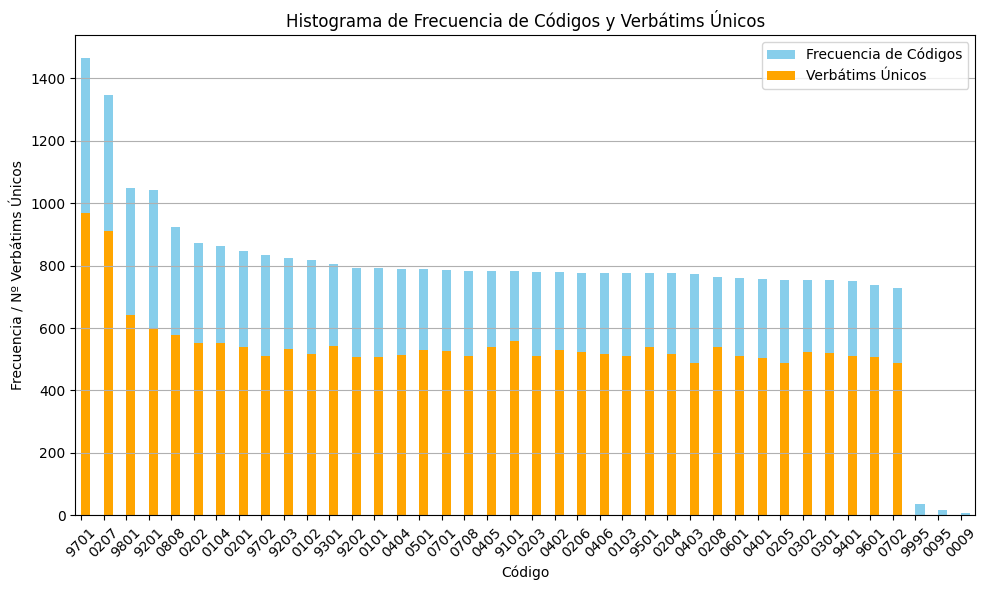

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con las frecuencias de códigos y los verbátims únicos
df_combinado = pd.DataFrame({'Frecuencia de Códigos': codigo_frecuencia, 'Verbátims Únicos': diversidad_comentarios})

# Ordenar el DataFrame por la frecuencia de códigos
df_combinado = df_combinado.sort_values(by='Frecuencia de Códigos', ascending=False)

# Graficar el histograma con barras colocadas una detrás de la otra
plt.figure(figsize=(10, 6))
df_combinado['Frecuencia de Códigos'].plot(kind='bar', color='skyblue', width=0.4, position=0, label='Frecuencia de Códigos')
df_combinado['Verbátims Únicos'].plot(kind='bar', color='orange', width=0.4, position=0, label='Verbátims Únicos')
plt.title('Histograma de Frecuencia de Códigos y Verbátims Únicos')
plt.xlabel('Código')
plt.ylabel('Frecuencia / Nº Verbátims Únicos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
